# ASSIGNMENT 5 - DANIEL JACK VAN ZYL (MULTI-LABEL CLASSIFICATION)

### Load Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("scene_train.csv", index_col=0)

# Display the first few rows of the dataset
data.head()

,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Att291,Att292,Att293,Att294,Class1,Class2,Class3,Class4,Class5,Class6
0,0.646467,0.666435,0.685047,0.699053,0.652746,0.407864,0.150309,0.535193,0.555689,0.580782,...,0.157332,0.247298,0.014025,0.029709,1,0,0,0,1,0
1,0.770156,0.767255,0.761053,0.745630,0.742231,0.688086,0.708416,0.757351,0.760633,0.740314,...,0.251454,0.137833,0.082672,0.036320,1,0,0,0,0,1
2,0.793984,0.772096,0.761820,0.762213,0.740569,0.734361,0.722677,0.849128,0.839607,0.812746,...,0.017166,0.051125,0.112506,0.083924,1,0,0,0,0,0
3,0.938563,0.949260,0.955621,0.966743,0.968649,0.869619,0.696925,0.953460,0.959631,0.966320,...,0.019267,0.031290,0.049780,0.090959,1,0,0,0,0,0
4,0.512130,0.524684,0.520020,0.504467,0.471209,0.417654,0.364292,0.562266,0.588592,0.584449,...,0.198151,0.238796,0.164270,0.184290,1,0,0,0,0,0


# Validation

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Splitting the features and labels
X = data.iloc[:, :294] # Feature columns
y = data.iloc[:, 294:] # Label columns

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

y = y.to_numpy()

### 1. k-Nearest Neighbours

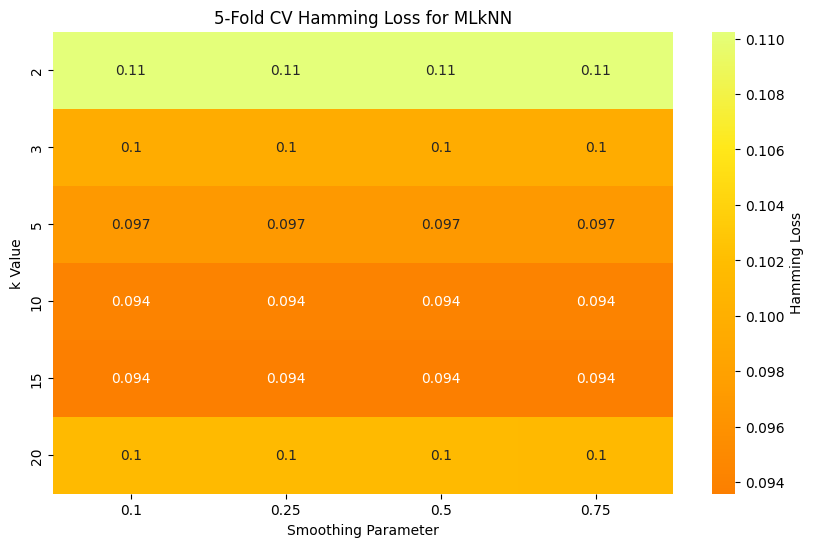

In [8]:
import pandas as pd
from skmultilearn.adapt import MLkNN
from sklearn.neighbors import NearestNeighbors

from sklearn.model_selection import KFold
from sklearn.metrics import hamming_loss
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define the parameter grid
k_values = [2, 3, 5, 10, 15, 20]
smoothing_parameters = [0.1, 0.25, 0.5, 0.75]

# Initialize a 2D array to store the average Hamming losses
results = np.zeros((len(k_values), len(smoothing_parameters)))

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Iterate over the parameter combinations
for i, k in enumerate(k_values):
    for j, s in enumerate(smoothing_parameters):
        
        hamming_losses = []  # to store the Hamming loss for each fold
        
        for train_index, test_index in kf.split(X):
            X_train, X_val = X[train_index], X[test_index]
            y_train, y_val = y[train_index], y[test_index]
            
            # Train the model
            knn_classifier = MLkNN(k=k, s=s)
            knn_classifier.fit(X_train, y_train)
            
            # Make predictions
            y_pred = knn_classifier.predict(X_val).toarray()
            
            # Compute the Hamming loss and store it
            h_loss = hamming_loss(y_val, y_pred)
            hamming_losses.append(h_loss)
        
        # Store the average Hamming loss
        results[i, j] = np.mean(hamming_losses)

# Plot the results in a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(results, annot=True, cmap='cool_r', cbar_kws={'label': 'Hamming Loss'}, 
            xticklabels=smoothing_parameters, yticklabels=k_values)
plt.xlabel('Smoothing Parameter')
plt.ylabel('k Value')
plt.title('5-Fold CV Hamming Loss for MLkNN')
plt.show()

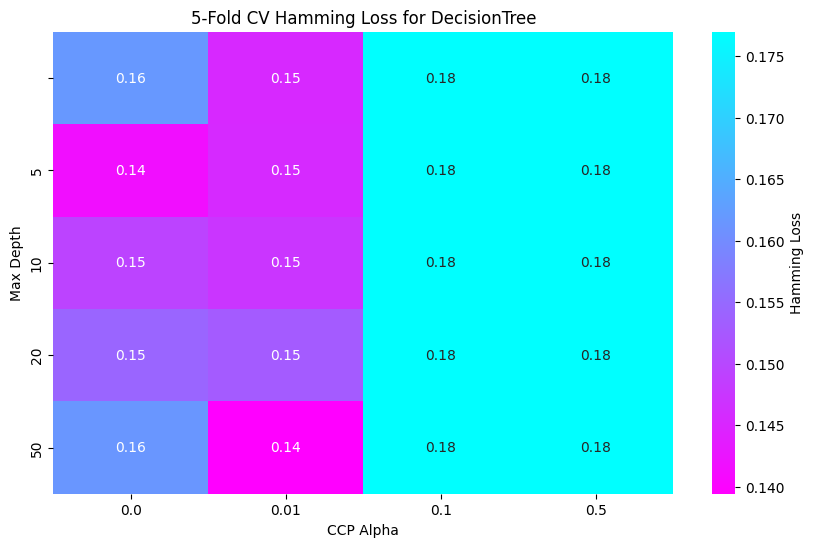

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.datasets import make_multilabel_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold

from sklearn.metrics import hamming_loss
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define the parameter grid
max_depth_values = [None, 5, 10, 20, 50]
ccp_alpha_values = [0.0, 0.01, 0.1, 0.5]

# Initialize a 2D array to store the average Hamming losses
results = np.zeros((len(max_depth_values), len(ccp_alpha_values)))

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Iterate over the parameter combinations
for i, max_depth in enumerate(max_depth_values):
    for j, ccp_alpha in enumerate(ccp_alpha_values):
        
        hamming_losses = []  # to store the Hamming loss for each fold
        
        for train_index, test_index in kf.split(X):
            X_train, X_val = X[train_index], X[test_index]
            y_train, y_val = y[train_index], y[test_index]
            
            # Train the model
            tree = DecisionTreeClassifier(splitter='random', criterion='entropy', max_depth=max_depth, ccp_alpha=ccp_alpha)
            tree.fit(X_train, y_train)
            
            # Make predictions
            y_pred = tree.predict(X_val)
            
            # Compute the Hamming loss and store it
            h_loss = hamming_loss(y_val, y_pred)
            hamming_losses.append(h_loss)
        
        # Store the average Hamming loss
        results[i, j] = np.mean(hamming_losses)

# Plot the results in a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(results, annot=True, cmap='cool_r', cbar_kws={'label': 'Hamming Loss'}, 
            xticklabels=ccp_alpha_values, yticklabels=max_depth_values)
plt.xlabel('CCP Alpha')
plt.ylabel('Max Depth')
plt.title('5-Fold CV Hamming Loss for DecisionTree')
plt.show()